In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from sklearn.manifold import TSNE

import torch
from torch.utils.data import DataLoader

In [2]:
from train import load_data
from torchfm.dataset.pecos_fm_format import PecosFMDataset, pair_collate_fn
from torchfm.model.efm import EmbeddingFactorizationMachineModel

In [3]:
os.environ['CUDA_VISIBLE_DEVICES'] = '4'

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [15]:
def plot_tsne(X_trn, X_tst, Z, n=1000, seed=1126, perplexity=30):
    np.random.seed(seed)
    X_trn_iis = np.random.choice(X_trn['embs'].shape[0], size=n, replace=False)
    X_tst_iis = np.random.choice(X_tst['embs'].shape[0], size=n, replace=False)
    Z_iis = np.random.choice(Z['embs'].shape[0], size=n, replace=False)
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    s = 5
    alpha = 0.5
    
    # X_trn, Z
    embs = np.concatenate([X_trn['embs'][X_trn_iis],
                           Z['embs'][Z_iis],], axis=0)
    
    tsne_embs = TSNE(learning_rate='auto', init='random', perplexity=perplexity).fit_transform(embs)
    X_trn_tsne = tsne_embs[:n]
    Z_tsne = tsne_embs[n:]
    
    axs[0].scatter(*X_trn_tsne.T, label='X_trn', s=s, alpha=alpha)
    axs[0].scatter(*Z_tsne.T, label='Z', s=s, alpha=alpha)
    axs[0].legend()
    
    # X_trn, Z
    embs = np.concatenate([X_tst['embs'][X_tst_iis],
                           Z['embs'][Z_iis],], axis=0)
    
    tsne_embs = TSNE(learning_rate='auto', init='random', perplexity=perplexity).fit_transform(embs)
    X_tst_tsne = tsne_embs[:n]
    Z_tsne = tsne_embs[n:]
    
    axs[1].scatter(*X_tst_tsne.T, label='X_tst', s=s, alpha=alpha)
    axs[1].scatter(*Z_tsne.T, label='Z', s=s, alpha=alpha)
    axs[1].legend()
    
    # X_trn, X_tst
    embs = np.concatenate([X_trn['embs'][X_trn_iis],
                           X_tst['embs'][X_tst_iis]], axis=0)
    
    tsne_embs = TSNE(learning_rate='auto', init='random', perplexity=perplexity).fit_transform(embs)
    X_trn_tsne = tsne_embs[:n]
    X_tst_tsne = tsne_embs[n:]
    
    axs[2].scatter(*X_trn_tsne.T, label='X_trn', s=s, alpha=alpha)
    axs[2].scatter(*X_tst_tsne.T, label='X_tst', s=s, alpha=alpha)
    axs[2].legend()
    
    fig.tight_layout()
    
    plt.show()

In [26]:
emb_dir = '../tevatron/examples/coCondenser-marco/encoding_s1_v0/'
lbl_dir = '../data/MS-MARCO/Ys/'
lbl_suffix = '400k'

X_trn, X_tst, Y_trn, Y_tst, Z = load_data(emb_dir, lbl_dir, lbl_suffix, None)

X_trn.shape = (502939, 768), X_tst.shape = (6980, 768), Z.shape = (8841823, 768)
Y_trn.pos.nnz = 426214, Y_trn.neg.nnz = 381231974, Y_tst.pos.nnz = 7436, Y_tst.neg.nnz = 0


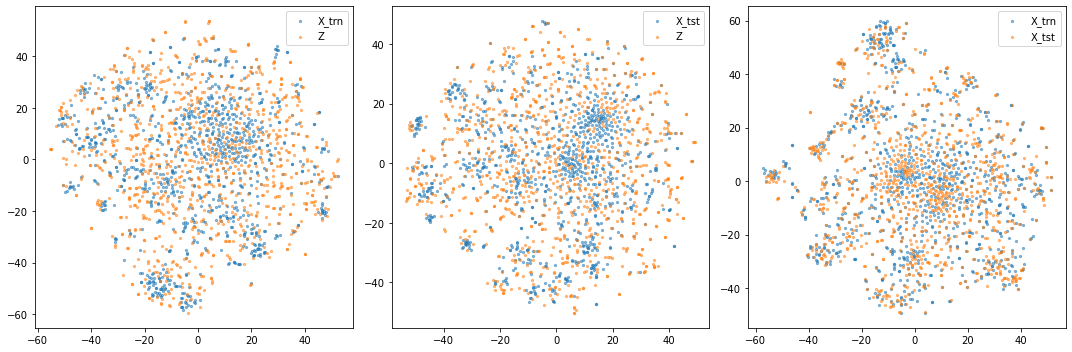

In [27]:
plot_tsne(X_trn, X_tst, Z, perplexity=20)

In [20]:
emb_dir = '../tevatron/examples/coCondenser-marco/retriever_model_s1_untie/embs/'
lbl_dir = '../data/MS-MARCO/Ys/'
lbl_suffix = '400k'

X_trn, X_tst, Y_trn, Y_tst, Z = load_data(emb_dir, lbl_dir, lbl_suffix, None)

X_trn.shape = (502939, 768), X_tst.shape = (6980, 768), Z.shape = (8841823, 768)
Y_trn.pos.nnz = 426214, Y_trn.neg.nnz = 381231974, Y_tst.pos.nnz = 7436, Y_tst.neg.nnz = 0


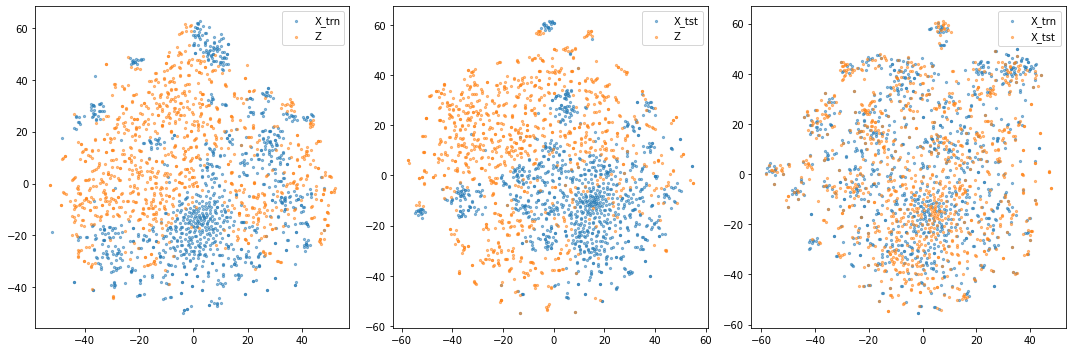

In [25]:
plot_tsne(X_trn, X_tst, Z, perplexity=20)